In [1]:
import os
from matchms.importing.load_from_mgf import load_from_mgf


data_folder = os.path.join("../../../data/pytorch/new_corinna_included/")

# Validation spectra
pos_val_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "positive_validation_spectra.mgf")))
neg_val_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "negative_validation_spectra.mgf")))

In [2]:
pos_train_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "positive_training_spectra.mgf")))
neg_train_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "negative_training_spectra.mgf")))

In [3]:
from matchms.filtering import require_minimum_number_of_high_peaks

In [5]:
from tqdm import tqdm
selected_pos_spectra = []
for spectrum in tqdm(pos_train_spectra):
    spectrum = require_minimum_number_of_high_peaks(spectrum, 5, 2)
    if spectrum is not None:
        selected_pos_spectra.append(spectrum)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 469257/469257 [07:04<00:00, 1106.54it/s]


In [6]:
selected_neg_spectra = []
for spectrum in tqdm(neg_train_spectra):
    spectrum = require_minimum_number_of_high_peaks(spectrum, 5, 2)
    if spectrum is not None:
        selected_neg_spectra.append(spectrum)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 130901/130901 [02:15<00:00, 965.18it/s]


In [7]:
print(len(pos_train_spectra))
print(len(neg_train_spectra))
print(len(selected_pos_spectra))
print(len(selected_neg_spectra))

469257
130901
292261
80600


In [8]:
from matchms.exporting.save_as_mgf import save_as_mgf

In [9]:
save_as_mgf(selected_pos_spectra, "../../../data/pytorch/test_with_peak_filtering/positive_training_spectra.mgf")
save_as_mgf(selected_neg_spectra, "../../../data/pytorch/test_with_peak_filtering/negative_training_spectra.mgf")
save_as_mgf(pos_val_spectra, "../../../data/pytorch/test_with_peak_filtering/positive_validation_spectra.mgf")
save_as_mgf(neg_val_spectra, "../../../data/pytorch/test_with_peak_filtering/negative_validation_spectra.mgf")


dict_keys(['spectra'])
dict_keys(['spectra'])
dict_keys(['spectra'])
dict_keys(['spectra'])


# Benchmark this model when we have a minimum number of peaks

In [10]:
import os
from ms2deepscore.MS2DeepScore import MS2DeepScore
from ms2deepscore.models.load_model import load_model
from matchms.importing.load_from_mgf import load_from_mgf
from ms2deepscore.utils import load_pickled_file
from ms2deepscore.models.load_model import load_model, load_embedding_evaluator

data_folder = os.path.join("../../../data/pytorch/test_with_peak_filtering/")
both_mode_folder = "trained_models/both_mode_precursor_mz_ionmode_10000_layers_500_embedding_2024_11_27_18_22_38/"

# Validation spectra
pos_val_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "positive_validation_spectra.mgf")))
neg_val_spectra = list(load_from_mgf(os.path.join(data_folder, "training_and_validation_split", "negative_validation_spectra.mgf")))

ms2ds_model = load_model(os.path.join(data_folder, both_mode_folder, "ms2deepscore_model.pt"))


/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

In [11]:
from tqdm import tqdm
selected_pos_spectra = []
for spectrum in tqdm(pos_val_spectra):
    spectrum = require_minimum_number_of_high_peaks(spectrum, 5, 2)
    if spectrum is not None:
        selected_pos_spectra.append(spectrum)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25412/25412 [00:12<00:00, 2039.93it/s]


In [12]:
selected_neg_spectra = []
for spectrum in tqdm(neg_val_spectra):
    spectrum = require_minimum_number_of_high_peaks(spectrum, 5, 2)
    if spectrum is not None:
        selected_neg_spectra.append(spectrum)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7551/7551 [00:04<00:00, 1841.79it/s]


In [14]:
from ms2deepscore.benchmarking.CalculateScoresBetweenAllIonmodes import CalculateScoresBetweenAllIonmodes

scores_for_5_peaks = CalculateScoresBetweenAllIonmodes(os.path.join(data_folder, both_mode_folder, "ms2deepscore_model.pt"), 
                                                                          selected_pos_spectra, selected_neg_spectra)

Calculating embeddings


16179it [00:35, 456.83it/s]
4544it [00:05, 799.74it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 812/812 [00:02<00:00, 384.58it/s]


Calculating tanimoto scores
Calculating embeddings


16179it [00:19, 817.05it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1742/1742 [00:04<00:00, 382.50it/s]


Calculating tanimoto scores
Calculating embeddings


4544it [00:05, 804.20it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 812/812 [00:02<00:00, 382.01it/s]

Calculating tanimoto scores


Selecting available inchikey pairs per bin: 10it [00:00, 47.34it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 135.09it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 298.55it/s]


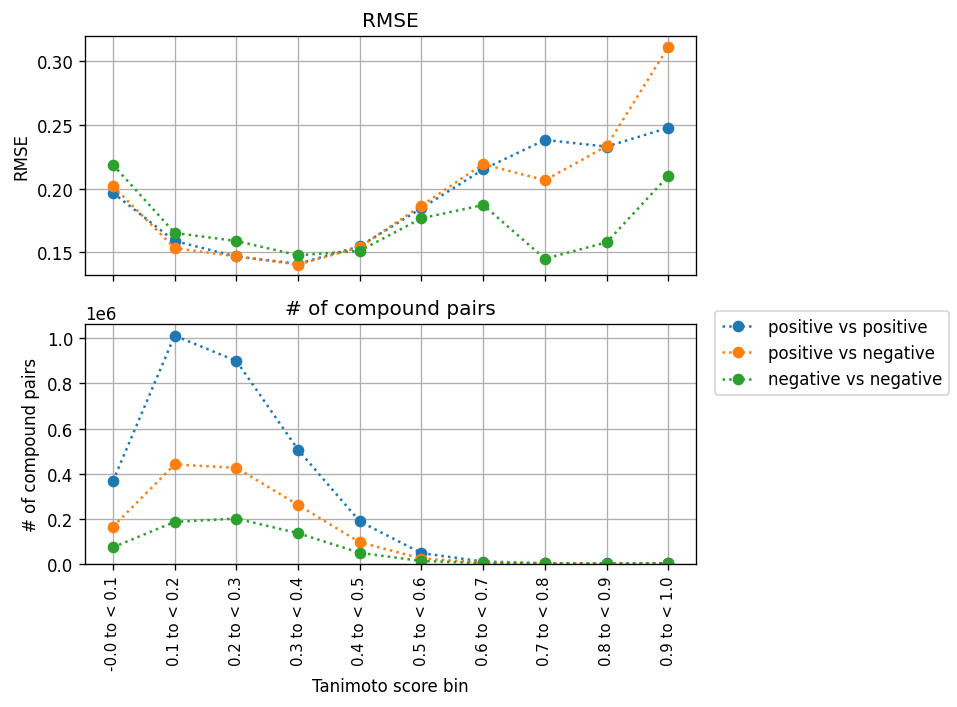

In [15]:
from ms2deepscore.benchmarking.plot_loss_per_bin import plot_loss_per_bin_multiple_benchmarks
plot_loss_per_bin_multiple_benchmarks(scores_for_5_peaks.list_of_predictions_and_tanimoto_scores(), 10, "RMSE")

In [16]:

ms2ds_model_normal = load_model(os.path.join("../../../data/pytorch/new_corinna_included/", "trained_models/both_mode_precursor_mz_ionmode_10000_layers_500_embedding_2024_11_21_11_23_17/", "ms2deepscore_model.pt"))

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

In [18]:
from ms2deepscore.benchmarking.CalculateScoresBetweenAllIonmodes import CalculateScoresBetweenAllIonmodes

scores_for_5_peaks_normal_model = CalculateScoresBetweenAllIonmodes(os.path.join("../../../data/pytorch/new_corinna_included/", "trained_models/both_mode_precursor_mz_ionmode_10000_layers_500_embedding_2024_11_21_11_23_17/", "ms2deepscore_model.pt"), 
                                                                          selected_pos_spectra, selected_neg_spectra)

Calculating embeddings


16179it [00:19, 820.60it/s]
4544it [00:05, 810.01it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 812/812 [00:02<00:00, 386.15it/s]


Calculating tanimoto scores
Calculating embeddings


16179it [00:19, 814.10it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1742/1742 [00:04<00:00, 391.75it/s]


Calculating tanimoto scores
Calculating embeddings


4544it [00:05, 799.96it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 812/812 [00:02<00:00, 388.68it/s]

Calculating tanimoto scores


Selecting available inchikey pairs per bin: 10it [00:00, 60.33it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 134.47it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 292.40it/s]


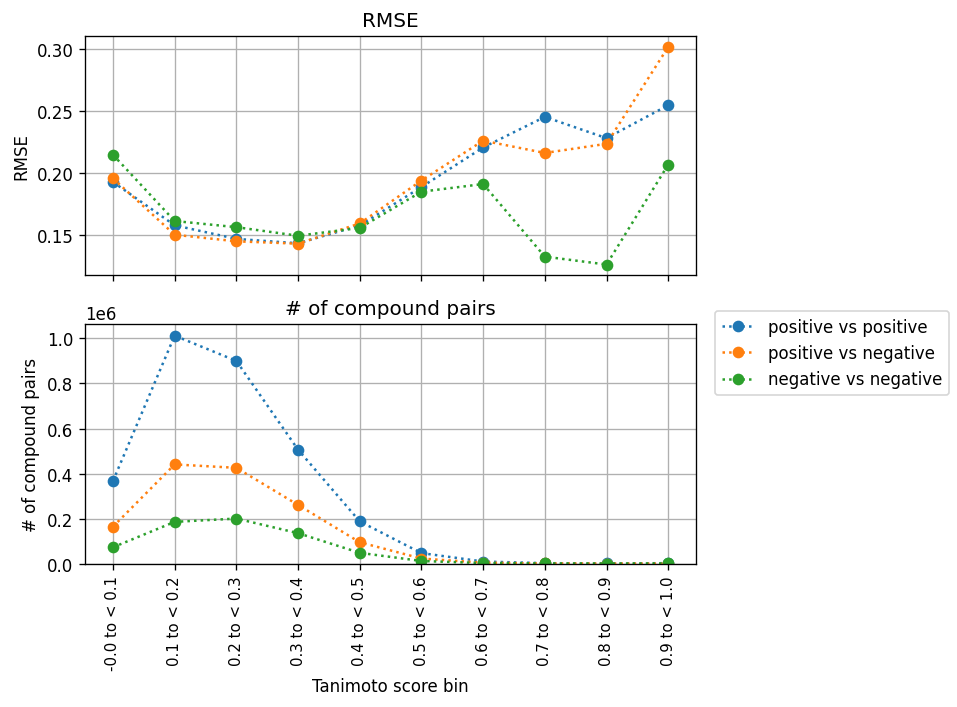

In [19]:
from ms2deepscore.benchmarking.plot_loss_per_bin import plot_loss_per_bin_multiple_benchmarks
plot_loss_per_bin_multiple_benchmarks(scores_for_5_peaks_normal_model.list_of_predictions_and_tanimoto_scores(), 10, "RMSE")

In [64]:
scores_for_5_peaks.pos_vs_pos_scores.label = f"positive vs positive, > 4 peaks, with intensity > 2%"
scores_for_5_peaks.pos_vs_neg_scores.label = f"positive vs negative, > 4 peaks, with intensity > 2%"
scores_for_5_peaks.neg_vs_neg_scores.label = f"negative vs negative, > 4 peaks, with intensity > 2%"

In [25]:
scores_for_5_peaks_normal_model.pos_vs_pos_scores.label = f"positive vs positive, trained on all spectra"
scores_for_5_peaks_normal_model.pos_vs_neg_scores.label = f"positive vs negative, trained on all spectra"
scores_for_5_peaks_normal_model.neg_vs_neg_scores.label = f"negative vs negative, trained on all spectra"

In [58]:
from ms2deepscore.validation_loss_calculation.PredictionsAndTanimotoScores import PredictionsAndTanimotoScores
from ms2deepscore.utils import create_evenly_spaced_bins
from matplotlib import pyplot as plt
import numpy as np
def plot_loss_per_bin_multiple_benchmarks(list_of_predictions_and_tanimoto_scores,
                                          nr_of_bins=10,
                                          loss_type="MSE", 
                                          title=""):
    """Combines the plot of multiple comparisons into one plot
    """
    ref_score_bins = create_evenly_spaced_bins(nr_of_bins)
    fig, ax1 = plt.subplots(1, 1, sharex=True,
                                   figsize=(8, 3), dpi=120)
    labels = []
    for predictions_and_tanimoto_scores in list_of_predictions_and_tanimoto_scores:
        bin_content, rmses = predictions_and_tanimoto_scores.get_average_loss_per_bin_per_inchikey_pair(
            loss_type, ref_score_bins)
        ax1.plot(np.arange(len(rmses)), rmses, "o:")
        labels.append(predictions_and_tanimoto_scores.label)
    fig.legend(labels, loc="center right", bbox_to_anchor=(1.3, 0.6))
    ax1.set_title(title)
    ax1.set_ylabel(loss_type)
    ax1.grid(True)

    plt.xticks(np.arange(len(ref_score_bins)),
               [f"{a:.1f} to < {b:.1f}" for (a, b) in ref_score_bins], fontsize=9, rotation='vertical')
    plt.tight_layout(rect=[0, 0, 0.75, 1])

Selecting available inchikey pairs per bin: 10it [00:00, 62.16it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 137.40it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 315.59it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 61.39it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 136.90it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 305.72it/s]


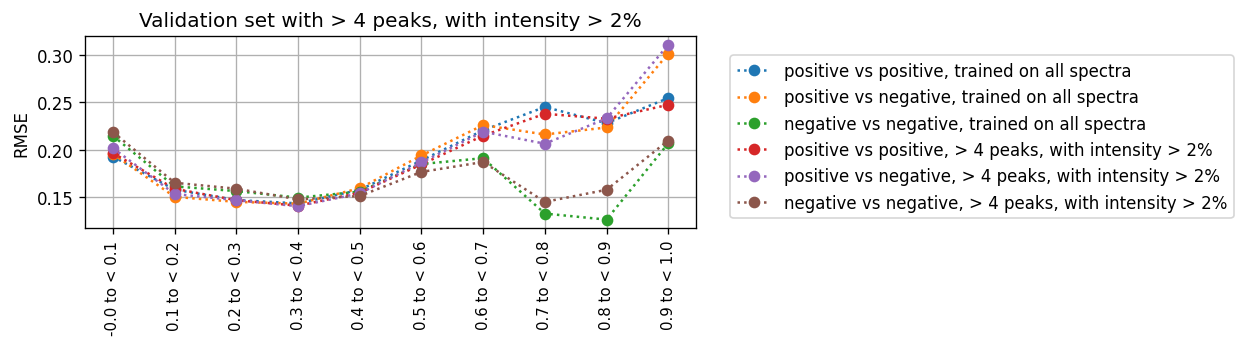

In [66]:
plot_loss_per_bin_multiple_benchmarks(scores_for_5_peaks_normal_model.list_of_predictions_and_tanimoto_scores() + scores_for_5_peaks.list_of_predictions_and_tanimoto_scores(), 
                                      10, "RMSE", 'Validation set with > 4 peaks, with intensity > 2%')

In [60]:
from ms2deepscore.benchmarking.CalculateScoresBetweenAllIonmodes import CalculateScoresBetweenAllIonmodes

scores_normal_model = CalculateScoresBetweenAllIonmodes(os.path.join("../../../data/pytorch/new_corinna_included/", "trained_models/both_mode_precursor_mz_ionmode_10000_layers_500_embedding_2024_11_21_11_23_17/", "ms2deepscore_model.pt"), 
                                                                          pos_val_spectra, neg_val_spectra)

/lustre/BIF/nobackup/jonge094/ms2deepscore/ms2deepscore/ms2deepscore/models/load_model.py:34: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_settings = torch.load(filen

Calculating embeddings


25412it [00:32, 782.36it/s]
7551it [00:09, 802.84it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 391.12it/s]


Calculating tanimoto scores
Calculating embeddings


25412it [00:30, 823.73it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1831/1831 [00:04<00:00, 391.29it/s]


Calculating tanimoto scores
Calculating embeddings


7551it [00:09, 808.98it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 389.86it/s]


Calculating tanimoto scores


In [61]:
from ms2deepscore.benchmarking.CalculateScoresBetweenAllIonmodes import CalculateScoresBetweenAllIonmodes

scores_model_with_less_than_5_peaks = CalculateScoresBetweenAllIonmodes(os.path.join(data_folder, both_mode_folder, "ms2deepscore_model.pt"), 
                                                                          pos_val_spectra, neg_val_spectra)

Calculating embeddings


25412it [00:31, 814.76it/s]
7551it [00:09, 803.03it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 384.89it/s]


Calculating tanimoto scores
Calculating embeddings


25412it [00:30, 821.53it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1831/1831 [00:04<00:00, 389.53it/s]


Calculating tanimoto scores
Calculating embeddings


7551it [00:09, 808.50it/s]


Calculating similarity between embeddings


Calculating fingerprints: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 924/924 [00:02<00:00, 388.81it/s]


Calculating tanimoto scores


In [67]:
scores_model_with_less_than_5_peaks.pos_vs_pos_scores.label = f"positive vs positive, > 4 peaks, with intensity > 2%"
scores_model_with_less_than_5_peaks.pos_vs_neg_scores.label = f"positive vs negative, > 4 peaks, with intensity > 2%"
scores_model_with_less_than_5_peaks.neg_vs_neg_scores.label = f"negative vs negative, > 4 peaks, with intensity > 2%"
scores_normal_model.pos_vs_pos_scores.label = f"positive vs positive, trained on all spectra"
scores_normal_model.pos_vs_neg_scores.label = f"positive vs negative, trained on all spectra"
scores_normal_model.neg_vs_neg_scores.label = f"negative vs negative, trained on all spectra"

Selecting available inchikey pairs per bin: 10it [00:00, 55.91it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 113.51it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 165.99it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 56.10it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 114.78it/s]
Selecting available inchikey pairs per bin: 10it [00:00, 230.04it/s]


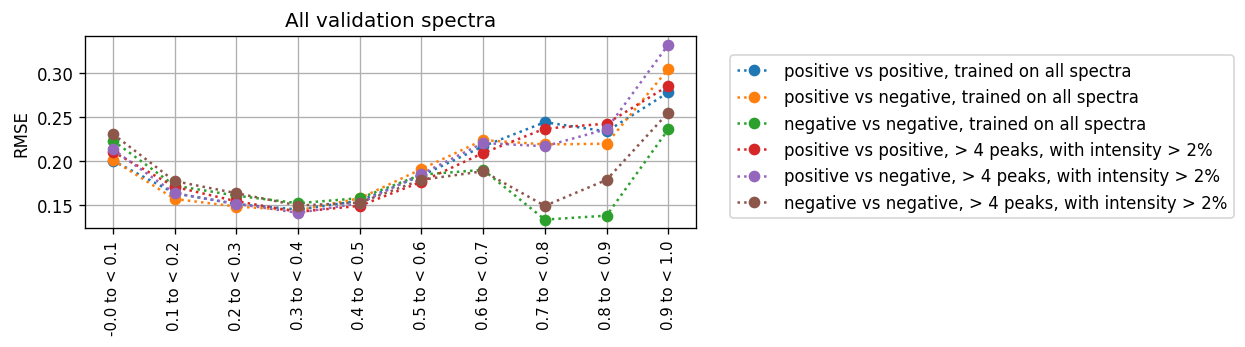

In [68]:
plot_loss_per_bin_multiple_benchmarks(scores_normal_model.list_of_predictions_and_tanimoto_scores() + scores_model_with_less_than_5_peaks.list_of_predictions_and_tanimoto_scores(), 
                                      10, "RMSE", 'All validation spectra')